# Medibank Health Insurance - Report

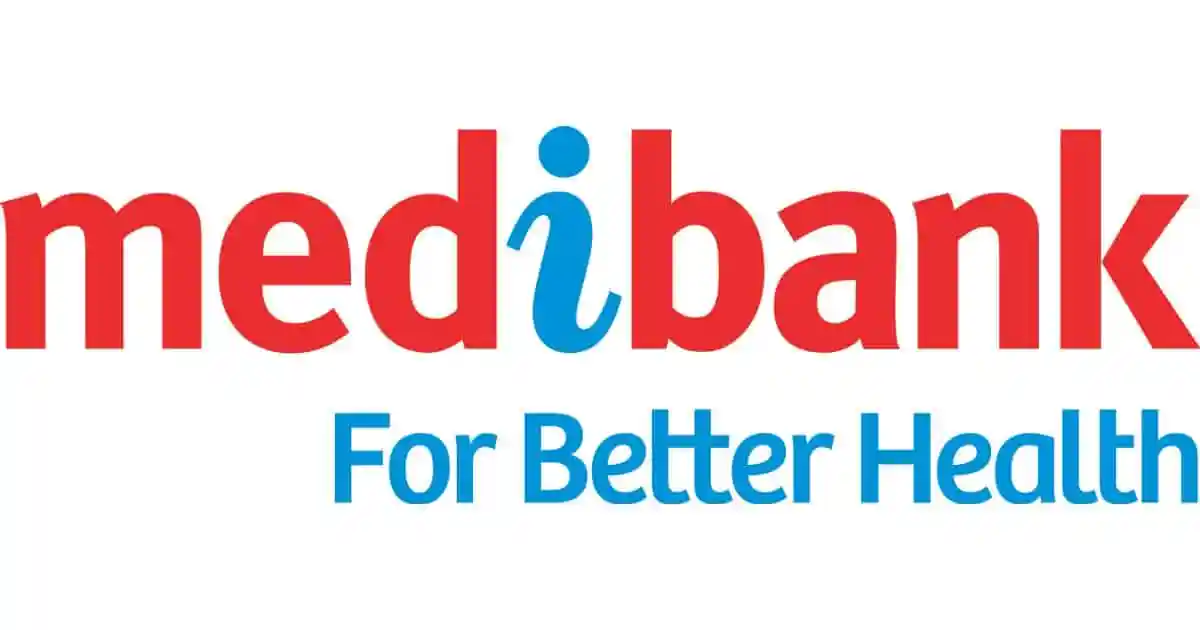

Medibank is an Australian health insurance company that was established in 1976. It is a government-owned corporation and is one of the largest health insurers in Australia, with over 3.7 million members. 

Medibank provides a wide range of health insurance products, including hospital cover, extras cover, and ambulance cover. They also offer a range of health services, including telephone health advice, health management programs, and health coaching. In addition, Medibank operates a number of health clinics throughout Australia, providing a range of health services to its members. 

Medibank is committed to improving the health and wellbeing of its members and the wider community. They invest in research and innovation to develop new ways to improve health outcomes, and they work closely with healthcare providers to improve the quality and affordability of healthcare services.

Recently, there is a divergence of views regarding the healthcare system in Australia. It has been suggested that these issues have been extensively discussed on multiple social media platforms. Therefore, it is important to understand common topics, discussions, conversations related to Medibank in order to derive insights and make effective business decisions. This can be done by applying AI and NLP techniques to analyse tweets which will be demonstrated below. 

## Install packages and Load libraries

In [158]:
!pip install pyLDAvis==3.4.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Data 

In [160]:
df = pd.read_csv('/content/Dataset 1 - Medibank.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
# display the column names of the datasets
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [162]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[]
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[]
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[]
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[]
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[]


# NLP Exploration

## Preprocessing

In [163]:
# Transform sentences into lowercase
df['tweet'] = df['tweet'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
# Following command is just to visualize the processed dataframe
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,simple tricks to make your plane ride more com...,en,"['travel', 'holiday']"
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,"medibank is weird, like- where is my colour wh...",en,[]
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,why is brett lee batting in the 2nd @medibank ...,en,['bigquestions']
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,the #detox recipe that will help you feel bran...,en,"['detox', 'happynewyear']"
21066,815390599851307008,2017-01-01 02:54:02+00:00,2017-01-01,02:54:02,s0menz,のん,@kkppi medibankてやつす。新規登録したらトーン無料取り放題す。,ja,[]


Remove twitter user ids that are mentioned in the tweet text. We will use regular expressions to do this. In applying the regular expression, we use the string in the format r"regular-expression".

In [165]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df['tweet'] = df['tweet'].apply(remove_twitter_ids)
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,simple tricks to make your plane ride more com...,en,"['travel', 'holiday']"
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,medibank is weird like where is my colour whee...,en,[]
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,why is brett lee batting in the 2nd ahm ad did...,en,['bigquestions']
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,the detox recipe that will help you feel brand...,en,"['detox', 'happynewyear']"
21066,815390599851307008,2017-01-01 02:54:02+00:00,2017-01-01,02:54:02,s0menz,のん,medibank,ja,[]


### Duplicate removal


It is essential we check for duplicates. Because, the tweets are extracted from Twitter API and it is likely the same tweet repeats multiple times. We can utilize pandas drop_duplicates() function.

In [166]:
# Check duplicate tweets count
duplicate_count = len(df['tweet'])-len(df['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df.shape[0])

duplicate count: 2319
total records before remove duplicates: 21067


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
# drop duplicates (keep the last tweet of each of the duplicates)
df = df.drop_duplicates(subset='tweet', keep="first")
print('updated record count:', df.shape[0])

updated record count: 18748


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now we will remove all punctuation, retaining just the text.

In [168]:
# Remove punctuations 
df['tweet'] = df['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-168-80d13be079d8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.


,id,created_at,date,time,username,name,tweet,language,hashtags
21061,815701651076091904,2017-01-01 23:30:03+00:00,2017-01-01,23:30:03,medibank,Medibank,make the perfect smoothie bowl in 5 easy steps...,en,"['smoothie', 'recipe', 'cooking']"
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,simple tricks to make your plane ride more com...,en,"['travel', 'holiday']"
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,medibank is weird like where is my colour whee...,en,[]
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,why is brett lee batting in the 2nd ahm ad did...,en,['bigquestions']
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,the detox recipe that will help you feel brand...,en,"['detox', 'happynewyear']"


### Stop words and domain related word removal

Now let's conduct further text pre- processing using NLTK library as we did in the first NLP workshop. First, remove stopwords.

In [169]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note that the term 'not' is in the stop word list. This will have a negative impact on sentiment analysis. However, if the NLP technique is topic modeling,  there will be no such impact.
For this case, we will remove the term 'not' from the stopword list.

In [172]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string
  
df['tweet'] = df['tweet'].apply(remove_stop_words)
df.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
21061,815701651076091904,2017-01-01 23:30:03+00:00,2017-01-01,23:30:03,medibank,Medibank,make perfect smoothie bowl 5 easy steps recipe...,en,"['smoothie', 'recipe', 'cooking']"
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,simple tricks make plane ride comfortable trav...,en,"['travel', 'holiday']"
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,medibank weird like colour wheel summon,en,[]
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,brett lee batting 2nd ahm ad didnt not get pic...,en,['bigquestions']
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,detox recipe help feel brand new happynewyear,en,"['detox', 'happynewyear']"


### Standardization of tweets

#### Stemming

In [175]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df['tweet_stem'] = df['tweet'].apply(stemming_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
# Compare the content vs. stemmed content
df[['tweet', 'tweet_stem']].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stem
21055,must hawke fraser distorted medibank born agn ...,must hawk fraser distort medibank born agn med...
21056,yes medibank fm whitlam wound fraser recall co...,ye medibank fm whitlam wound fraser recal co s...
21057,fraser destroyed medibank,fraser destroy medibank
21058,lass medibank sold small bits already happenin...,lass medibank sold small bit alreadi happen ba...
21060,recognize ref got bipartisanship however destr...,recogn ref got bipartisanship howev destroy me...
21061,make perfect smoothie bowl 5 easy steps recipe...,make perfect smoothi bowl 5 easi step recip cook
21062,simple tricks make plane ride comfortable trav...,simpl trick make plane ride comfort travel hol...
21063,medibank weird like colour wheel summon,medibank weird like colour wheel summon
21064,brett lee batting 2nd ahm ad didnt not get pic...,brett lee bat 2nd ahm ad didnt not get pick ga...
21065,detox recipe help feel brand new happynewyear,detox recip help feel brand new happynewyear


The stemming has turned term 'recipe' to 'recip', 'easy' to 'easi' thus, stemming has not deemed expected results in this context. 

#### Lemmatization

In [177]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [178]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df['tweet_lemmatized'] = df['tweet'].apply(lemmatize_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
df[['tweet', 'tweet_stem', 'tweet_lemmatized']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stem,tweet_lemmatized
0,fraser government destroyed original medibank ...,fraser govern destroy origin medibank liber ph...,fraser government destroyed original medibank ...
1,actually whitlam made medibank fraser done wor...,actual whitlam made medibank fraser done worst...,actually whitlam made medibank fraser done wor...
2,316 fair greens labor problem dental medicare ...,316 fair green labor problem dental medicar al...,316 fair green labor problem dental medicare a...
3,actually greg labor invented pbs 70 years ago ...,actual greg labor invent pb 70 year ago pm cur...,actually greg labor invented pb 70 year ago pm...
4,85 dont education medibank medicare nbn slow e...,85 dont educ medibank medicar nbn slow expens ...,85 dont education medibank medicare nbn slow e...
5,medibank waiting period,medibank wait period,medibank waiting period
6,316 frankly amazing quickly entire sector lube...,316 frankli amaz quickli entir sector lube ben...,316 frankly amazing quickly entire sector lube...
7,slow metabolism cause weight gain medibank eas...,slow metabol caus weight gain medibank east el...,slow metabolism cause weight gain medibank eas...
8,free university tafe medibank opposed vietnam ...,free univers tafe medibank oppos vietnam war p...,free university tafe medibank opposed vietnam ...
9,labor always party focused health insiders bou...,labor alway parti focus health insid bought us...,labor always party focused health insider boug...


From the comparison above, it is clear that lemmatization is the most suitable method for pre-processing texts, therefore, the lemmatized texts are best used for further analysis in next steps.

## Word frequency analysis

Let us look at the most occuring words in our tweet dataset.

In [181]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df['tweet']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


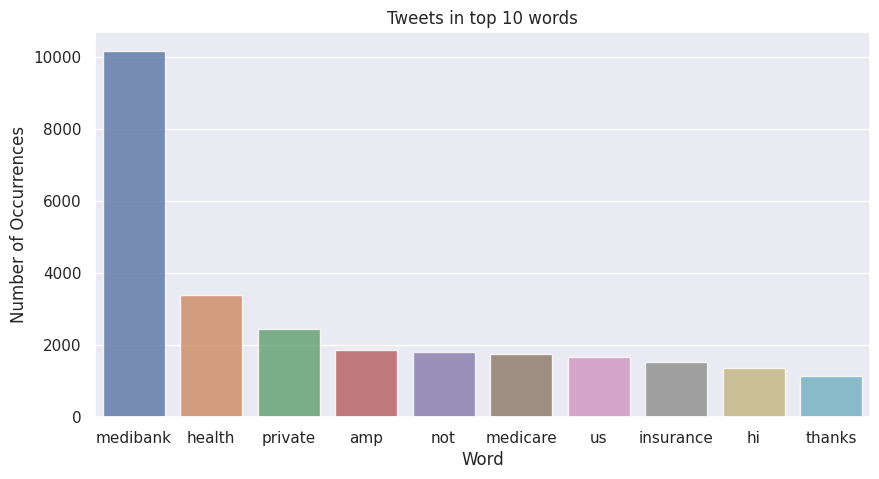

In [182]:
# Visualize the top word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

In [183]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


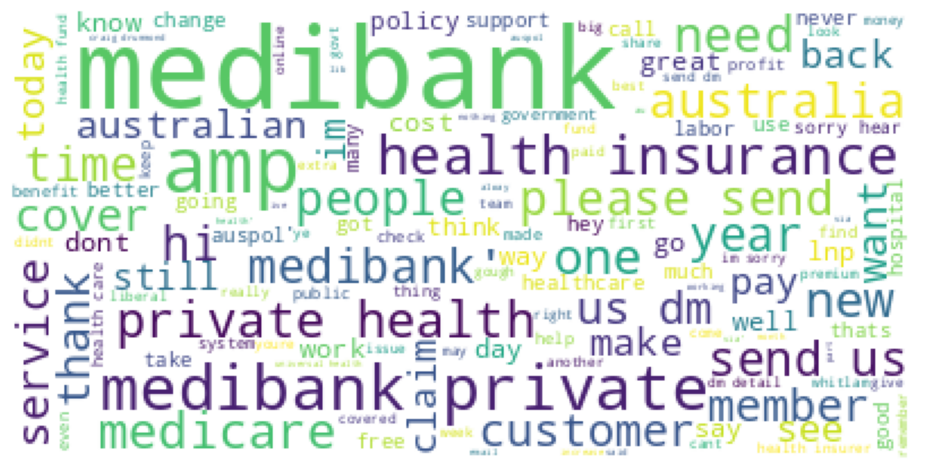

In [184]:
corpus = list(df['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Insights**

Word frequency analysis is a common technique to identify the most frequently appeared words in a given document or corpus. While this generates an overview of frequently occuring words, not all of them provide meaningful insights. In this case, "medibank", "health insurance", "health", "amp" are high-frequency words which do not provide any valuable insights about the topics, discussions or opinions related to health insurance as these words are too generic. Therefore, the above words should be removed in order to extract more actionable insights.

### Remove common words

Let's remove context specific words and the most common words from the tweets.

In [185]:
# Creating a list of custom stopwords"
new_words_to_remove = ["health", "medibank", "amp", "us", "medicare", "thanks", "hi", "not", "get", "australia", "dont", "im", "would", "one", "back", "help", "dm", "people", "time", "know", "look", "sorry", "care", "healthcare", "new", "see", "year", "details", "send", "members", "years", "pay", "via", "well", "public","rt","u","b","1","2","3","4","5","6","7","8","9","10","please","hear","like"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
# Remove common words
# We will use lambda function here.
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,tweet_stem,tweet_lemmatized
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,fraser government destroyed original liberals ...,en,[],fraser govern destroy origin medibank liber ph...,fraser government destroyed original medibank ...
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,actually whitlam made fraser done worst resurr...,en,[],actual whitlam made medibank fraser done worst...,actually whitlam made medibank fraser done wor...
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,316 fair greens labor problem dental always re...,en,[],316 fair green labor problem dental medicar al...,316 fair green labor problem dental medicare a...
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany",actually greg labor invented pbs 70 ago pm cur...,en,[],actual greg labor invent pb 70 year ago pm cur...,actually greg labor invented pb 70 year ago pm...
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,85 education nbn slow expensive obsolete kevin,en,[],85 dont educ medibank medicar nbn slow expens ...,85 dont education medibank medicare nbn slow e...


In [187]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df['tweet']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
# Look at the top 20 words
word_frequency[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


private       2464
insurance     1547
free           834
cover          824
good           667
fraser         659
need           637
whitlam        617
better         582
lnp            562
auspol         539
hawke          536
government     533
policy         506
labor          485
service        484
great          481
got            471
system         470
still          469
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


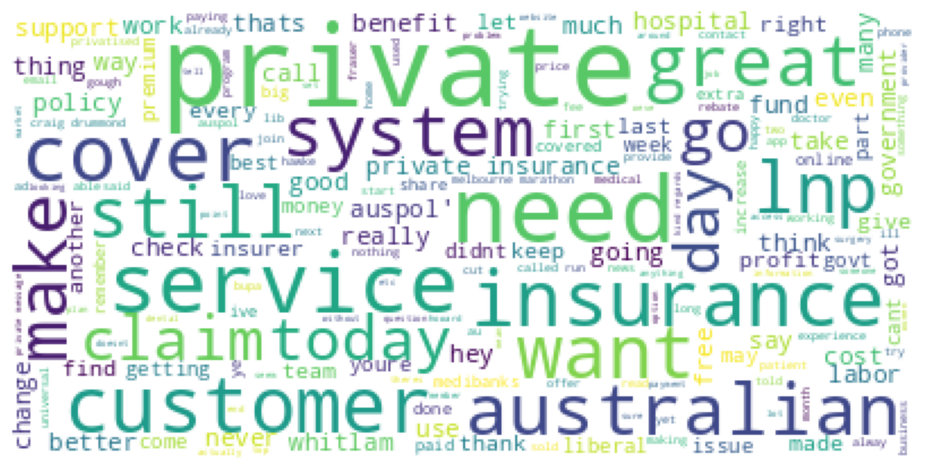

In [189]:
corpus = list(df['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

After removing the listed words above, the result provides more relevant words to Medibank Health Insurance. The most frequently occuring words are "private", "insurance", "please", "like", "free"...
* "private" and "insurance": these words may refer to private health insurance services or products, or people discussions about these services and products.
* "please", "like", "good" suggest people' positive reactions to the services and products of Medibank. This shows that Medibank is doing a great job in provide health insurance services and people are satisfied with their experiences with Medibank's services and offerings.
* "free" and "cover" may present free offers from Medibank or a wide coverage in their services and products.
* "whitlam", "hawke" may be related to discussions about Gough Whitlam and Bob Hawke who are famous for establishing Medibank and Medicare which provide universal healthcare for Australian people. These tweets may refer to people' appreciation about the works of these two prime ministers or discussion about changes of the healthcare system or policies during the Whitlam government and the Hawke government.
* "lnp", "government", "auspol" refer to Liberal National Party, Government and Australian Politics & Election Coverage. This indicates that people may be discussing about government's actions or policies or changes to the current healthcare sector. Also, this could suggest public opinions and reactions to the acts of the government towards healthcare problems, such as Medibank Data Breach.

# NLP Insights

## Bigrams and Trigrams

The following commands will extract bigrams from the tweet dataset.
From here onwards, we will isolate tweets for each provider to conduct a comparative analysis.

### Bigrams

We will use CountVectorizer object from sklearn to generate bi-grams and tri-grams. 

In [190]:
#@title
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):
    
    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0) 

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
bigrams_df = get_ngrams(df['tweet'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
bigrams_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('private insurance', 400),
 ('craig drummond', 189),
 ('melbourne marathon', 163),
 ('private message', 142),
 ('kind regards', 128),
 ('ceo craig', 120),
 ('pet insurance', 112),
 ('gough whitlam', 111),
 ('live chat', 103),
 ('direct message', 100),
 ('south bank', 95),
 ('marathon festival', 91),
 ('travel insurance', 85),
 ('bob hawke', 85),
 ('customer service', 85),
 ('feel good', 84),
 ('full name', 82),
 ('regards robin', 78),
 ('private ltd', 78),
 ('live better', 76),
 ('good program', 75),
 ('getting touch', 72),
 ('ever since', 69),
 ('malcolm fraser', 69),
 ('climate change', 65),
 ('private insurers', 64),
 ('premium increases', 64),
 ('insurance company', 64),
 ('private insurer', 63),
 ('bank piazza', 63),
 ('premium increase', 62),
 ('fossil fuels', 62),
 ('share price', 61),
 ('whitlam introduced', 60),
 ('whitlam government', 60),
 ('make sure', 58),
 ('per cent', 55),
 ('got rid', 54),
 ('regards mary', 54),
 ('free feelgoodprogram', 53),
 ('date birth', 52),
 ('p

Convert bigrams of the dataset to a dataframe with column names bi-gram and frequency.

In [193]:
bigrams_df_ = pd.DataFrame(bigrams_df)
bigrams_df_.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization of Bigram Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


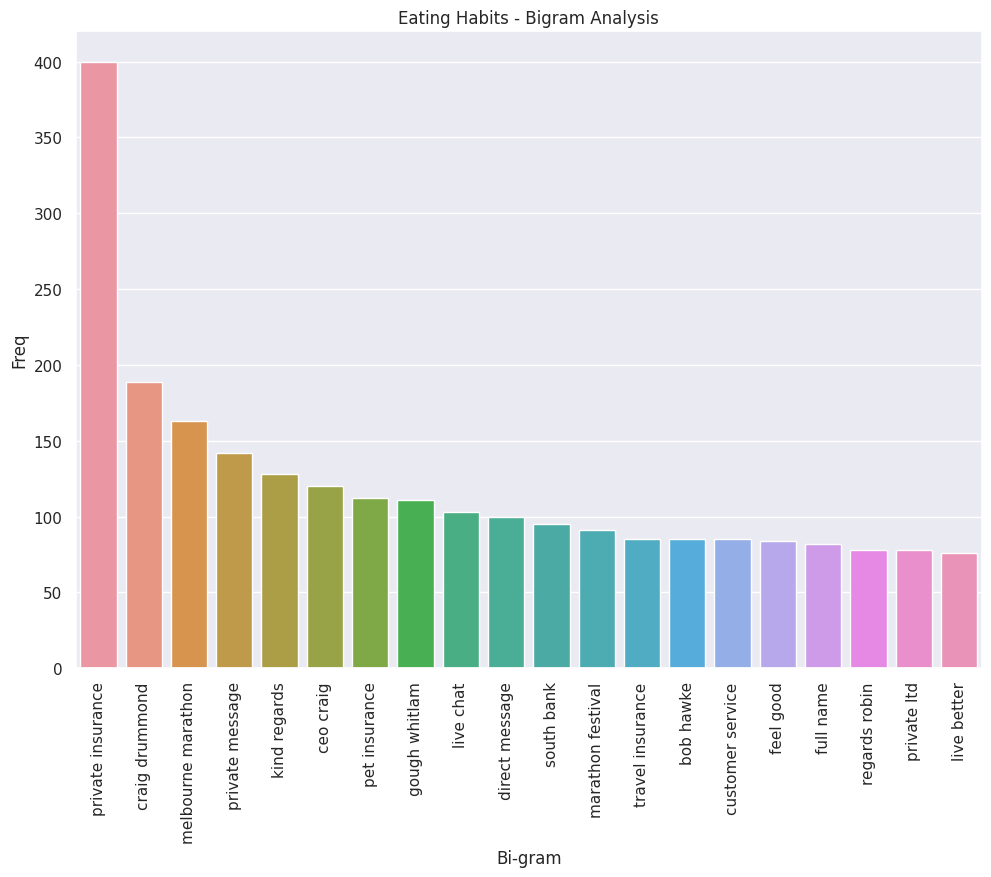

In [194]:
#@title
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(11.69,8.27)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_df_[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Eating Habits - Bigram Analysis')
plt.show()

### Insights

Bigrams are neighboring words that frequently appear together in a text. By analysing bigrams, we can derive insights and gain a better understanding of the discussions, opinions related to Medibank specifically or health insurance in general.

Overall, "private insurance" is the most frequently appeared bigram which might indicate informations concerning private insurance services of Medibank or public discussions or opinions regarding private insurance. In addition, bigrams, such as "pet insurance" or "travel insurance ", also suggest other services and products offered by Medibank. Furthermore, there are several people'names in the bigram analysis chart, such as "craig drummond", "ceo craig", "gough whitlam", "bob hawke". These bigrams may refer to any works or achievements of these people as Craig Drummond used to be CEO of Medibank Private Limited, Gough Whitlam, the 21st prime minister of Australia, advocated the Medibank proposal in 1975 and Bob Hawke, the 23rd prime minister of Australia, introduced Medicare from its first iterations Medibank. The bigram analysis also indicate several events, namely "melbourne marathon" and "marathon festival" which could refer to Biggest Medibank Melbourne Marathon Festival in 2018. Finally, the bigram analysis suggests positive sentiments and responds from customers towards Medibank services through words such as "customer service", "feel good", "live better". Moreover, we can also identify reasons why customers are satisfied with offered services such as "private message", "direct message", "live chat" to better accommodate customer needs.

### Trigrams

In [195]:
trigrams_df = get_ngrams(df['tweet'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
trigrams_df_ = pd.DataFrame(trigrams_df)
trigrams_df_.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization of Trigram Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


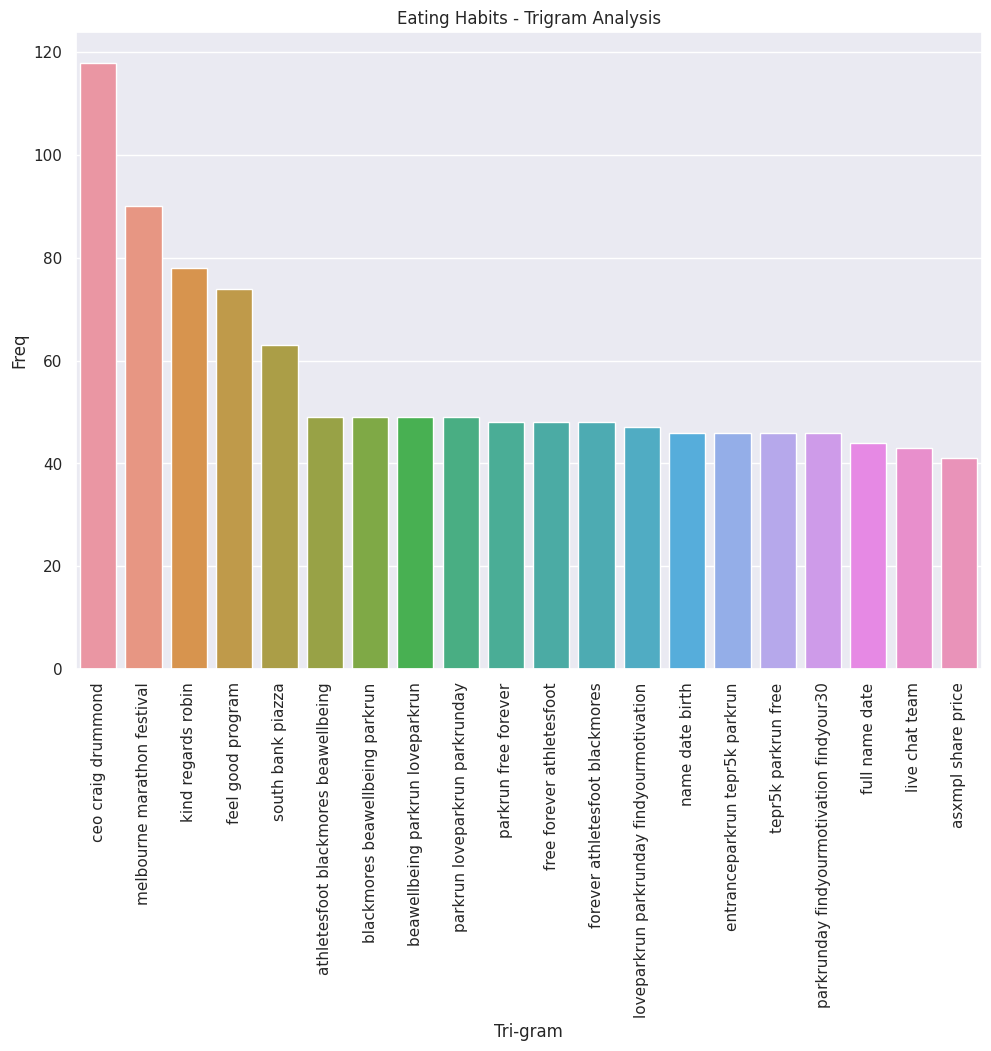

In [197]:
#@title
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(11.69,8.27)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_df_[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Eating Habits - Trigram Analysis')
plt.show()

### Insights

Trigrams indicate three consecutive words that apprear frequently together in a text or dataset. 

From the result above, it appears that while the trigram analysis shows similar information as the bigram analysis, it also presents some novel insights. 
On the one hand, trigrams such as "ceo craig drummond", "melbourne marathon festival", "feel good program", "please private message", "live chat team" still provide same information gained from the bigram analysis.

On the other hand, the trigram analysis also generates some novel insights from the dataset. Trigrams such as "athletesfoot blackmores bewellbeing", "parkrun loveparkrun parkrunday", so on may refer to Medibank parkrun programs and their parnerships with Blackmores and The Athlete's Foot. These might be related to the promotion of the parkrun on twitter or public discussions about the program. Finally, "name date birth" and "full name date" might refer to Medibank Data Breach as the compromised records consist of name, birth dates, passport numbers.

## Topic Modeling
We will conduct a topic modeling for one of the twitter datasets here.  
It is possible to conduct topic modeling using single words, bigrams, trigrams or n-grams.  
Will be using a topic modeling algorithm named - LDA (Latent Dirichlet Allocation) for this task. 

### Setting-up

In [ ]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(df['tweet'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['fraser government destroyed original liberals philosophically opposed universal heathcare system cannot trusted maintaining',
 'actually whitlam made fraser done worst resurrected hawke',
 '316 fair greens labor problem dental always refusal dentists participate dental part original plan dentists simply refused part nothing changed libs course',
 'actually greg labor invented pbs 70 ago pm curtin gough whitlams labor govt invented libs closed labor reinvented hawke hero howard declared libs sworn enemies universal',
 '85 education nbn slow expensive obsolete kevin']

In [ ]:
# Tokenization
texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fraser',
  'government',
  'destroyed',
  'original',
  'liberals',
  'philosophically',
  'opposed',
  'universal',
  'heathcare',
  'system',
  'cannot',
  'trusted',
  'maintaining'],
 ['actually',
  'whitlam',
  'made',
  'fraser',
  'done',
  'worst',
  'resurrected',
  'hawke'],
 ['316',
  'fair',
  'greens',
  'labor',
  'problem',
  'dental',
  'always',
  'refusal',
  'dentists',
  'participate',
  'dental',
  'part',
  'original',
  'plan',
  'dentists',
  'simply',
  'refused',
  'part',
  'nothing',
  'changed',
  'libs',
  'course'],
 ['actually',
  'greg',
  'labor',
  'invented',
  'pbs',
  '70',
  'ago',
  'pm',
  'curtin',
  'gough',
  'whitlams',
  'labor',
  'govt',
  'invented',
  'libs',
  'closed',
  'labor',
  'reinvented',
  'hawke',
  'hero',
  'howard',
  'declared',
  'libs',
  'sworn',
  'enemies',
  'universal'],
 ['85', 'education', 'nbn', 'slow', 'expensive', 'obsolete', 'kevin']]

In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'df.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(texts[0])
print('alphabetically sorted', sorted(texts[0]))

['fraser', 'government', 'destroyed', 'original', 'liberals', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
alphabetically sorted ['cannot', 'destroyed', 'fraser', 'government', 'heathcare', 'liberals', 'maintaining', 'opposed', 'original', 'philosophically', 'system', 'trusted', 'universal']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(texts[1])
print('alphabetically sorted', sorted(texts[1]))

['actually', 'whitlam', 'made', 'fraser', 'done', 'worst', 'resurrected', 'hawke']
alphabetically sorted ['actually', 'done', 'fraser', 'hawke', 'made', 'resurrected', 'whitlam', 'worst']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'cannot': 0, 'destroyed': 1, 'fraser': 2, 'government': 3, 'heathcare': 4, 'liberals': 5, 'maintaining': 6, 'opposed': 7, 'original': 8, 'philosophically': 9, 'system': 10, 'trusted': 11, 'universal': 12, 'actually': 13, 'done': 14, 'hawke': 15, 'made': 16, 'resurrected': 17, 'whitlam': 18, 'worst': 19, '316': 20, 'always': 21, 'changed': 22, 'course': 23, 'dental': 24, 'dentists': 25, 'fair': 26, 'greens': 27, 'labor': 28, 'libs': 29, 'nothing': 30, 'part': 31, 'participate': 32, 'plan': 33, 'problem': 34, 'refusal': 35, 'refused': 36, 'simply': 37, '70': 38, 'ago': 39, 'closed': 40, 'curtin': 41, 'declared': 42, 'enemies': 43, 'gough': 44, 'govt': 45, 'greg': 46, 'hero': 47, 'howard': 48, 'invented': 49, 'pbs': 50, 'pm': 51, 'reinvented': 52, 'sworn': 53, 'whitlams': 54, '85': 55, 'education': 56, 'expensive': 57, 'kevin': 58, 'nbn': 59, 'obsolete': 60, 'slow': 61, 'period': 62, 'waiting': 63, 'amazing': 64, 'bent': 65, 'demons': 66, 'eating': 67, 'entire': 68, 'frankly': 69, 'fund'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet_id = 0
print(texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(texts[tweet_id])) # each token is represented as a id from a dictionary

['fraser', 'government', 'destroyed', 'original', 'liberals', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Generate the topic model

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus] 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We need to define how many topics we capture through LDA.

In [ ]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Below code will build the LDA topic model.
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above LDA model is built with 10 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.
You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"insurance" + 0.012*"happy" + 0.010*"really" + 0.010*"need" + 0.009*"private" + 0.009*"email"'),
 (1,
  '0.022*"direct" + 0.020*"message" + 0.020*"membership" + 0.015*"replied" + 0.015*"wellness" + 0.013*"address"'),
 (2,
  '0.017*"free" + 0.014*"feelgoodprogram" + 0.014*"private" + 0.011*"ceo" + 0.011*"class" + 0.011*"profit"'),
 (3,
  '0.011*"2017" + 0.011*"recipe" + 0.007*"healthy" + 0.006*"top" + 0.006*"living" + 0.006*"index"'),
 (4,
  '0.014*"fraser" + 0.013*"private" + 0.011*"whitlam" + 0.010*"insurance" + 0.010*"hawke" + 0.009*"champions"'),
 (5,
  '0.017*"thank" + 0.016*"experience" + 0.015*"melbourne" + 0.013*"message" + 0.013*"architecture" + 0.010*"regards"'),
 (6,
  '0.018*"auspol" + 0.012*"accc" + 0.010*"dave" + 0.010*"services" + 0.008*"service" + 0.007*"international"'),
 (7,
  '0.019*"melbourne" + 0.018*"marathon" + 0.012*"better" + 0.011*"heres" + 0.010*"court" + 0.007*"diet"'),
 (8,
  '0.041*"private" + 0.021*"insurance" + 0.012*"ausbiz" + 0.010*"custom

The results above show all of the topics generated by the model with regard to the defined number of topics. In addition, each generated topic is a combination of words with assigned weight. While this provides an overview of topics from twitter, it is not very useful in deriving detailed and meaningful insights. This can be solved by interactive topic analyzer below.

### Interactive topic analyzer

In [ ]:
#@title
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4        4.415977 -116.236275       1        1  31.234754
7      109.807556    4.679146       2        1  18.340962
3       55.390568   77.099312       3        1  12.263281
6      -24.606852    5.661006       4        1   5.576438
0      -62.396759  -62.954014       5        1   5.468832
2       12.031970  -49.465984       6        1   5.454285
9       80.192551  -69.013687       7        1   5.416450
5      -91.327782   15.310899       8        1   5.415118
8      -23.491880   75.568291       9        1   5.415027
1       41.554222    9.910626      10        1   5.414855, topic_info=           Term        Freq       Total Category  logprob  loglift
116     private  177.000000  177.000000  Default  30.0000  30.0000
1284  melbourne   86.000000   86.000000  Default  29.0000  29.0000
3981   marathon   60.000000   60.000000  Default  28.0000  28.0000
314   insurance  125.000000  125.000000  Default  27.0000  27.0000
109      auspol   86.000000   86.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
472        list    4.220920   12.878201  Topic10  -5.4828   1.8005
1907      reply    3.937319   10.249330  Topic10  -5.5523   1.9593
1583       love    4.147414   26.010880  Topic10  -5.5003   1.0800
1109  privatise    3.889033   11.658171  Topic10  -5.5647   1.8182
819       today    3.934650   29.080092  Topic10  -5.5530   0.9158

[629 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
2356       8  0.957202    132
9245       5  0.915447     19
209        1  0.914586   1975
209        2  0.043552   1975
3651       4  0.609416    1st
...      ...       ...    ...
886        8  0.068657  youre
886        9  0.034328  youre
886       10  0.068657  youre
6764       7  0.820945     yr
18175      6  0.633942  zumba

[1218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 7, 1, 3, 10, 6, 9, 2])

The interactive topic analyzer above presents meaningful insights about topics derived from the dataset. 

Overll, it is evident that topic 1 is the most frequently appeared topic, followed by topic 2. In contrast, the other topics seem to have a lower rate of appearance.

Regarding topic 1, "fraser", "whitlam", "hawke", "champions", "sold" are the most frequently occuring words in this topic. These words might refer to news or discussions related to Gough Whitlam, Bob Hawke and Malcolm Fraser who are prime ministers of Australia. The word "champions" might suggest Bob Hawke winning over Malcolm Fraser and ended his term as Prime Minister. In addition, this could also refer to the sale of Medibank Private to private businesses and Malcolm Fraser's warning of the escalating fees resulting from this.

With regard to topic 2, "marathon" and "melbourne" have the highest rate of appearance, suggesting the Medibank Melbourne Marathon Festival in 2018 as mentioned above or marathon training guides for routes around Melbourne.

Topic 3 consists of words such as "recipe", "healthy", "living", suggesting the healthy lifestyle promotion of Medibank. These might include marketing posts from Medibank about healthy lifestyle, food recipes... or people' reactions and discussions about Medibank's promotion.

"accc" and "dave" are the most frequently occuring words in topic 4. While it seems not to provide any useful insights, after researching thoroughly, these words may refer to ACCC (Australian Competition and Consumer Commission) taking actions against Medibank for misleading and deceptive conduct case and Federal Court Judge David is in favor of Medibank.

Topic 5 mostly discuss about Medibank parkrun and people' reactions about that

Topic 6 may refer to Medibank Feel Good Program which offers free classes in order to promote the wellbeing and fitness of the public.

With "investment" and "tennis" as the two most frequently appeared words, topic 7 may indicate the further invesment and sponsorship of Medibank Private to Australian tennis

From words such as "experience", "feedback", "message", "thank", it is likely that topic 8 is about customer experiences with Medibank services, along with positive reactions to these services.

Concerning topic 10, this includes words such as "direct", "membership", "replied", "wellness", "message", "address", "workplace", indicating the everyday services of Medibank to support customers in answering questions related to the above words.

## Sentiment Analysis

### General Sentiment Analysis

In [198]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
# Obtain polarity scores generated by TextBlob
df['textblob_score'] = df['tweet_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
neutral_thresh = 0.05
# Convert polarity score into sentiment categories
df['textblob_sentiment'] = df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh
else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization of General Sentiment Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


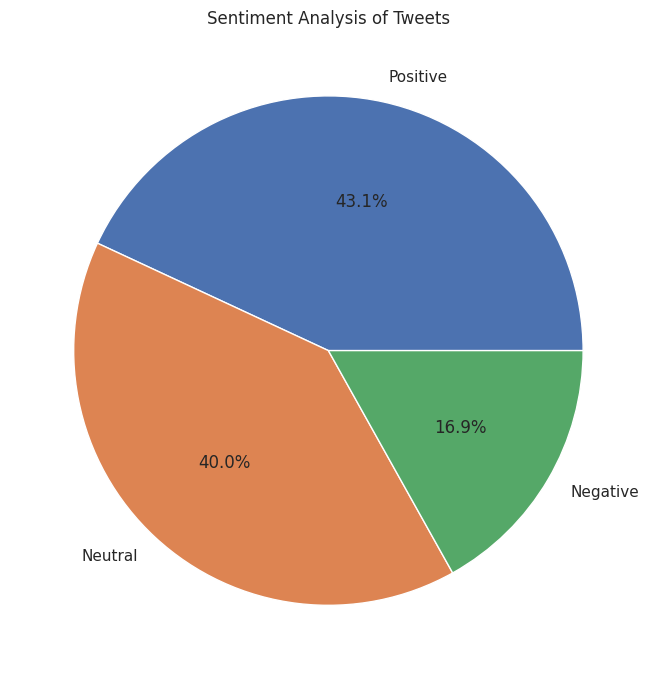

In [201]:
#@title
# Count the number of tweets in each sentiment category
sentiment_counts = df['textblob_sentiment'].value_counts()

# Create a pie chart of the sentiment counts
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### Insights

Based on the analysis of the tweets, it can be observed that the majority of them express a positive or neutral sentiment. However, a small proportion of tweets, approximately 16.9% of the total, linked to negative sentiment. Hence, it is important to further scrutinize the specific negative contexts that are present within this minority group of Tweets to gain a comprehensive understanding of the overall sentiment 

### Topics associated with Negative Sentiment

In [202]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [203]:
# Select the negative tweets
negative_tweets = df[df['textblob_sentiment'] == 'Negative']
# Create a list of all words in the negative tweets
negative_words = [word.lower() for tweet in negative_tweets['tweet'] for word in word_tokenize(tweet)]
# Remove stopwords from the list of negative words
stop_words = set(stopwords.words('english'))
negative_words = [word for word in negative_words if word not in stop_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,tweet_stem,tweet_lemmatized,textblob_score,textblob_sentiment
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,fraser government destroyed original liberals ...,en,[],fraser govern destroy origin medibank liber ph...,fraser government destroyed original medibank ...,0.125000,Positive
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,actually whitlam made fraser done worst resurr...,en,[],actual whitlam made medibank fraser done worst...,actually whitlam made medibank fraser done wor...,-0.500000,Negative
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,316 fair greens labor problem dental always re...,en,[],316 fair green labor problem dental medicar al...,316 fair green labor problem dental medicare a...,0.218750,Positive
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany",actually greg labor invented pbs 70 ago pm cur...,en,[],actual greg labor invent pb 70 year ago pm cur...,actually greg labor invented pb 70 year ago pm...,-0.033333,Neutral
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,85 education nbn slow expensive obsolete kevin,en,[],85 dont educ medibank medicar nbn slow expens ...,85 dont education medibank medicare nbn slow e...,-0.400000,Negative


In [205]:
# Count the occurrences of each word in the list of negative words
word_counts = {}
for word in negative_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the words by frequency and print the top 10
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
top_keyword = sorted_words[0][0]
print("Top 10 keywords associated with negative sentiment:")
for word, count in sorted_words[:10]:
    print(word, count)

Top 10 keywords associated with negative sentiment:
private 410
insurance 296
cover 165
fraser 164
lnp 146
service 126
auspol 124
long 124
need 121
ill 111


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This suggests that people may have negative feelings or associations with these topics in some contexts.

### Top 10 tweets associated with Negative Sentiment

In [206]:
#@title
# Extract 10 tweets that contain the top keyword
tweets_with_keyword = negative_tweets[negative_tweets['tweet'].str.contains(top_keyword)]['tweet'][:10]

# Print the tweets
for tweet in tweets_with_keyword:
    print(tweet)

auspol thread shows broken system become money going private insurance hospitals system worked way designed private aampe stepup treat pers bulk billing price
private use private hospitalbecause hubby due second hip replacement thru hospitalshould done last put covidwe cant afford 1000s dollarswhat fuck mean
actually problem oppositeprivate means means decent used universal rethink model
private whose executives scored independent assessment contracts ndis guise groups set either plena healthstrong cant remember including anna bligh next dc course bloody channel nine seven far
private sends email lonely another way money may lonely want talk shrink
sold telstra abbott sold private put peter costello charge funds
howard sold private mates created largest ever coalition pork barrel future fund future fund forced divest 5m sanctioned chinese weapons company
already paid service introduction whitlam libs gutted thankfully took second swing brought howard wanted save donors forced private
d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Insights

Based on the result above, it is clear that the negative tweets concerns about private health insurance degradation. Discussions about how broken the health insurance systems, and the unaffordable ever-increasing premiumns from private health insurance and hospitals are what causing people' negative reactions. In addition, desspite premiums continue to increase, there is no promise about the improved healthcare offerings which peole feel unfair and unworthy for the amount of fees that they have to pay.

### Sentiment over time

In [207]:
df_date_wise = df.groupby(['date'])['textblob_score'].mean().reset_index(name='mean_textblob_score').set_index('date')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Plot of Sentiment over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


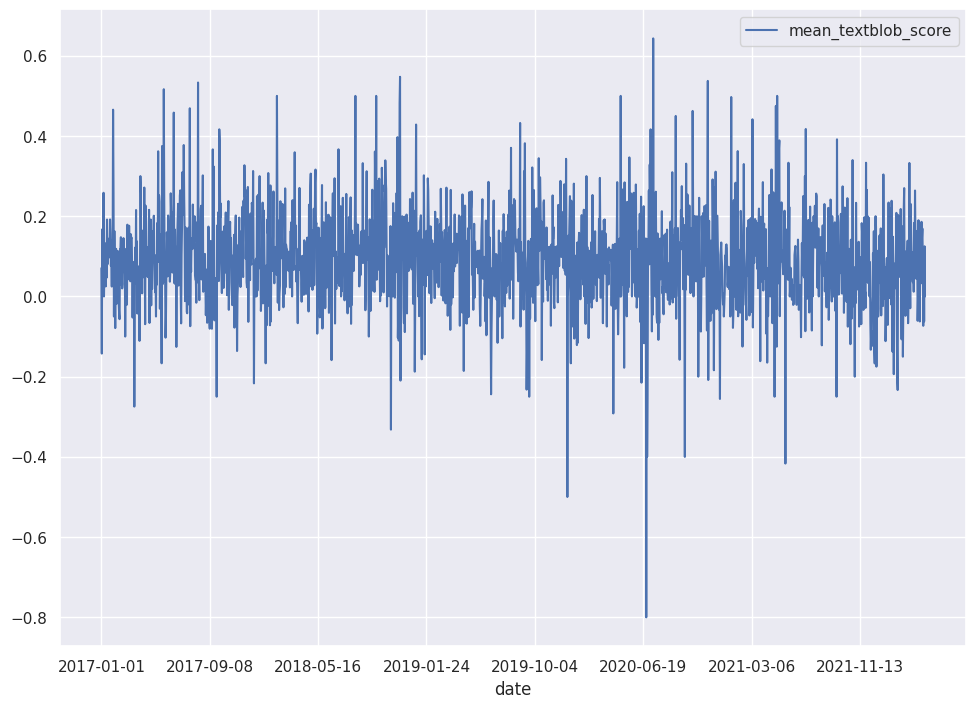

In [208]:
#@title
ax = df_date_wise.plot(figsize=(11.69,8.27))

#### Lowest sentiment score

In [209]:
df_date_wise[df_date_wise['mean_textblob_score']<=-0.6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_textblob_score
date,
2020-06-27,-0.8


In [210]:
df_date = df[df['date']=='2020-06-27']

df_date.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,tweet_stem,tweet_lemmatized,textblob_score,textblob_sentiment
5339,1276998909148057600,2020-06-27 22:00:40+00:00,2020-06-27,22:00:40,wagtailed,Will Wagtail,hate speech harms halt advertising facebook st...,en,"['facebook', 'stophateforprofit']",hate speech harm health halt advertis facebook...,hate speech harm health halt advertising faceb...,-0.8,Negative


In [211]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_date['tweet']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Visualization of Lowest sentiment score analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


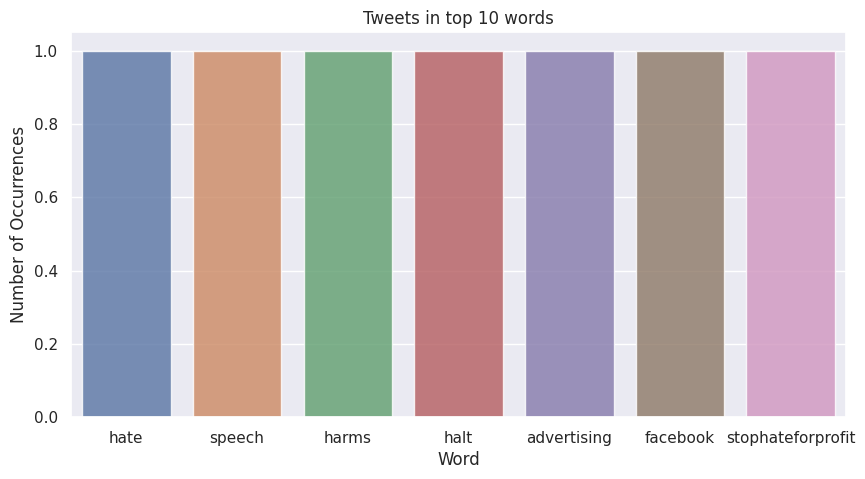

In [212]:
#@title
# Visualize the top word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

In [213]:
#@title
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


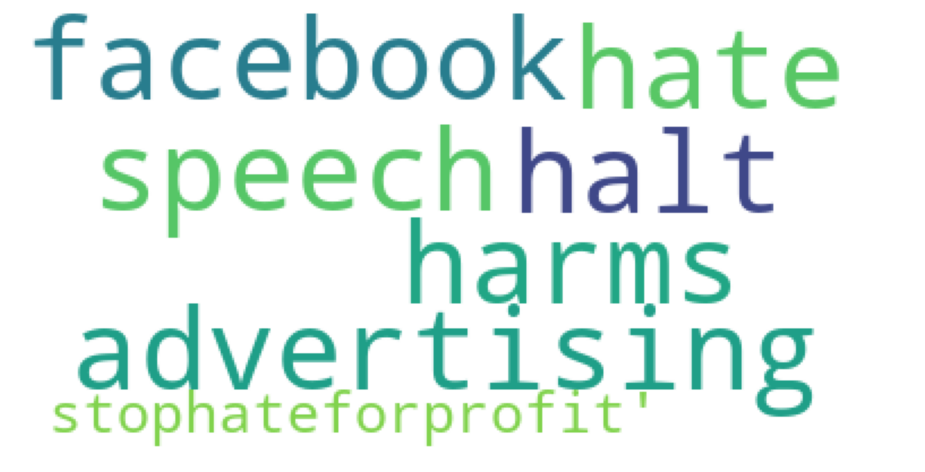

In [214]:
#@title
corpus = list(df_date['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(figsize=(11.69,8.27))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Insights

Regarding the day that has the lowest sentiment, from the result above, it appears that the information may not be related to Medibanka and may refer Facebook Ad Boycott Campaign ‘Stop Hate For Profit’.

#### Highest sentiment score

In [215]:
df_date_wise[df_date_wise['mean_textblob_score']>=0.6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_textblob_score
date,
2020-07-13,0.643362


In [216]:
df_date = df[df['date']=='2020-07-13']

df_date.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,tweet_stem,tweet_lemmatized,textblob_score,textblob_sentiment
5230,1282565955684630528,2020-07-13 06:42:07+00:00,2020-07-13,06:42:07,ekdental,EK Dental Surgery,special offer patients gap exam scale clean fl...,en,"['dentistglenwaverley', 'glenwaverleydentalcli...",special offer new patient pay gap exam scale c...,special offer new patient pay gap exam scale c...,0.286724,Positive
5231,1282490461035225089,2020-07-13 01:42:08+00:00,2020-07-13,01:42:08,cericat,Ceri Cat,remember frasers admin best got recollection s...,en,[],rememb one fraser admin best got recollect not...,remember one frasers admin best got recollecti...,1.000000,Positive


In [217]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_date['tweet']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Visualisation of Highest sentiment score analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


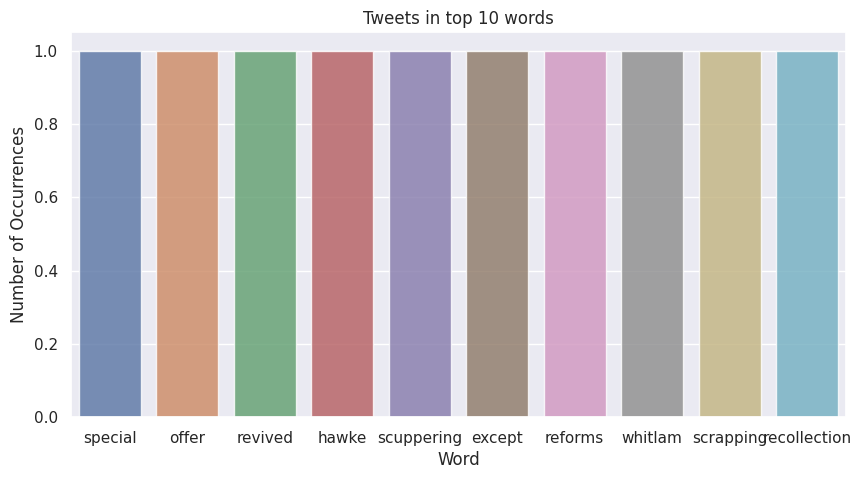

In [218]:
#@title
# Visualize the top word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

In [219]:
#@title
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


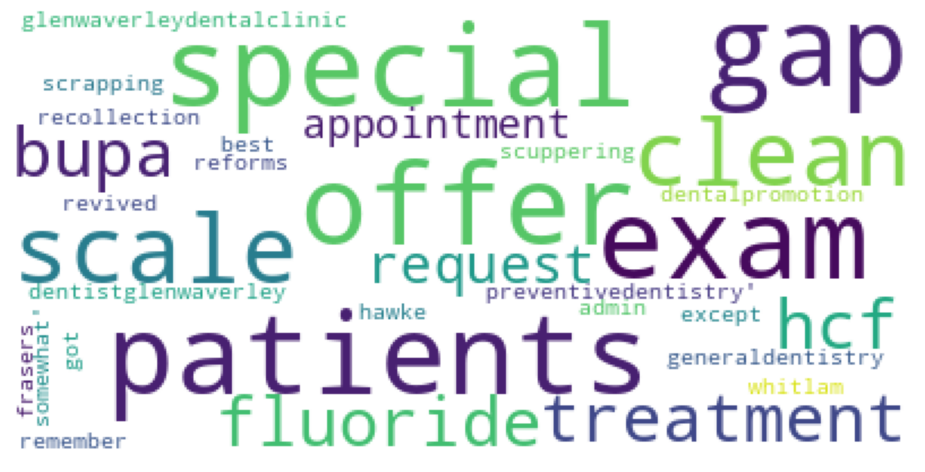

In [220]:
#@title
corpus = list(df_date['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(figsize=(11.69,8.27))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Insights

Regarding the day that has the highest sentiment, from the result above, there are positive reactions towards some special offers of treatments or exams for patients.

## Temporal Analysis

In [221]:
df_date_wise = df.groupby(['date'])['tweet'].count().reset_index(name='tweet_count').set_index('date')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Plot number of tweets over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


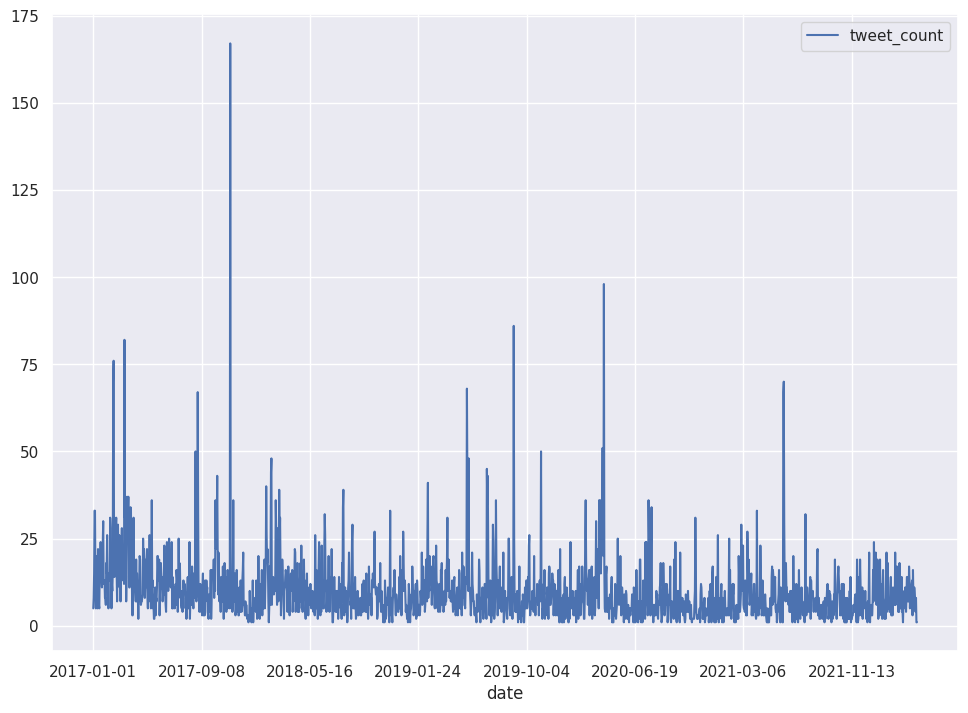

In [222]:
#@title
ax = df_date_wise.plot(figsize=(11.69,8.27))

## Day with Highest number of tweets

In [223]:
df_date_wise[df_date_wise['tweet_count']>=150]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_count
date,
2017-11-13,167


In [224]:
df_date = df[df['date']=='2017-11-13']

df_date.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,tweet_stem,tweet_lemmatized,textblob_score,textblob_sentiment
15334,930220235839356928,2017-11-13 23:46:01+00:00,2017-11-13,23:46:01,belindacoates,Belinda Coates,done dump holdings fossil fuels climate change...,en,[],well done medibank dump hold fossil fuel clima...,well done medibank dump holding fossil fuel cl...,0.000000,Neutral
15335,930219755159486464,2017-11-13 23:44:06+00:00,2017-11-13,23:44:06,malurussally,Sally Forsstrom,dump fossil fuel holdings fossil fuels impacts...,en,"['fossil', 'health', 'climate']",medibank dump fossil fuel hold fossil fuel hea...,medibank dump fossil fuel holding fossil fuel ...,0.000000,Neutral
15336,930217559210598400,2017-11-13 23:35:23+00:00,2017-11-13,23:35:23,drcbsteer,Christopher Steer,dumps fossil fuel investments aushealth,en,['aushealth'],medibank dump fossil fuel invest aushealth,medibank dump fossil fuel investment aushealth,0.000000,Neutral
15337,930210137004011521,2017-11-13 23:05:53+00:00,2017-11-13,23:05:53,sophiapickles,Sophia Pickles,fossil fuel divestment drops investments worth...,en,['divestment'],fossil fuel divest medibank drop invest worth ...,fossil fuel divestment medibank drop investmen...,0.166667,Positive
15338,930208868835184641,2017-11-13 23:00:51+00:00,2017-11-13,23:00:51,ejn_greencareer,Environmental Info,dump holdings fossil fuels climate change fear...,en,['climatechange'],medibank dump hold fossil fuel climat chang he...,medibank dump holding fossil fuel climate chan...,0.000000,Neutral


In [225]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_date['tweet']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualisation of Top 10 words in highest tweet count day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


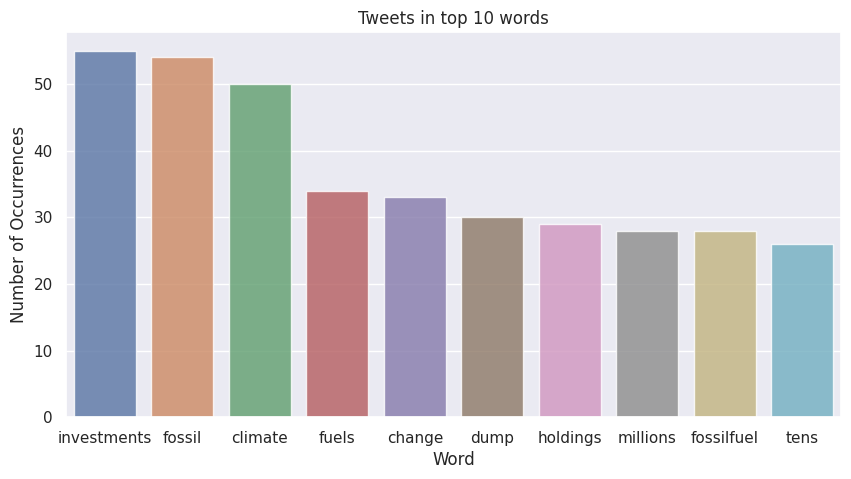

In [226]:
#@title
# Visualize the top word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

We will now visualize the text corpus that we created after pre-processing to get insights on the most frequently used words.

In [227]:
#@title
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


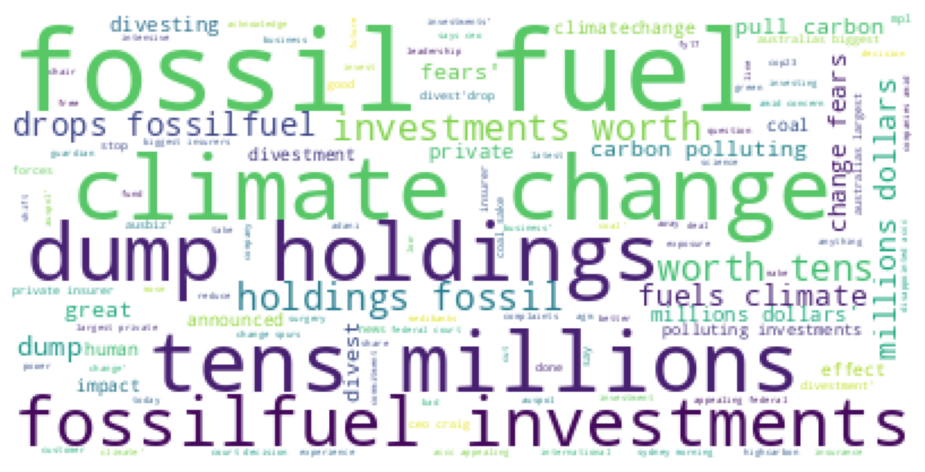

In [228]:
#@title
corpus = list(df_date['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(figsize=(11.69,8.27))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Insights

Regarding the highest tweet-count day, words such as "investment", "fossil fuel", "climate change" may refer to Medibank's investment on fossil fuel, causing them to lose customers as a result. For a company committed to the good health and wellbeing of its customers, it absurb that Medibank investing on fossil fuels which only harms public health but also causes climate change. Therefore, it is reasonable that on this specific day, the number of tweets is relatively high as users and customers really concerned about this action from Medibank.

## Recommendations

Based on the insights gathered from N-grams analysis, Topic modelling, Sentiment analysis and Temporal analysis above, Medibank Health Insurance can consider the following marketing strategy:

* Regarding what Medibank is current doing great so far, promoting healthy lifestyle programs, marathon trainings or marathon festivals receive positve reactions from customers. Therefore a great way to promote their services and products is to integrate these into the above events and programs. Customers might feel that Medibank is all about improving public health and healthcare systems, and their services and products are also about caring for customers. This, as a result, would not only increase the revenue, but also increase the brand awareness and brand's value. Moreover, the current customer service is also effective and efficient as we received positive feedbacks from customers on social media. This can be further improved by upgrading current technology stacks to reduce latency and providing traninings for staffs to deal with difficult customer cases. All of this would help improve customer experience and satisfaction towards Medibank.
* From the insights gathered from sentiment analysis, it is clear that customers really concern about the costs of healthcare and health insurance. While lowering the costs could a temporal solution, it could negatively affect the total revenue and the promised quality of services from Medibank. In addition, lowering all premiums may raise customers'questions about the quality of services and products offered from Medibank. Therefore, a better strategy to use is to offer discounts or rewards to customers based on some conditions, for example: participating in Medibank health promoting events. By applying this, not only can Medibank make customers feel treasured and valued, but also increase customer engagement with the business.
* Concerning negative reactions towards Medibank from Temporal analysis, there are several strategies to address this. The first and most important strategy is to response promptly. An unexpected increase of negative comments, discussions, tweets towards a matter related to the business means customers are really angry and demanding answers from the business. Therefore, lack of response or not timely response can be viewed as an attempt to ignore the issue. In addition, the business should not be too defensive, especially if the topic is sensitive or controversial. A good strategy is to spend time acknowledging and analysing those negative feedbacks and show customers that their opinions are heard. Also, the busines should also show that the issue is taken seriously by listing ways to address the issue.

## References

* Edward, K. (2023). What Caused the Medibank Data Breach?. Retrieved from https://www.upguard.com/blog/what-caused-the-medibank-data-breach#:~:text=The%20Medibank%20hack%20began%20with,access%20to%20Medibank's%20internal%20system.

* The Sydney Morning Herald (2006). Medibank sale a great pity: Fraser. Retrieved from https://www.smh.com.au/national/medibank-sale-a-great-pity-fraser-20061103-gdor0v.html

* Market Forces. Medibank losing customers due to fossil fuel investments. Retrieved from https://www.marketforces.org.au/medibank-losing-customers-due-to-fossil-fuel-investments/

* Michael, M. (2017). Medibank drops fossil-fuel investments worth tens of millions of dollars. Retrieved from https://www.theguardian.com/environment/2017/nov/13/medibank-drops-fossil-fuel-investments-worth-tens-of-millions-of-dollars

* Afdhel, A. (2020). Facebook Ad Boycott Campaign ‘Stop Hate For Profit’ Gathers Momentum And Scale: Inside The Movement For Change. Retrieved from https://www.forbes.com/sites/afdhelaziz/2020/06/24/facebook-ad-boycott-campaign-stop-hate-for-profit-gathers-momentum-and-scale-inside-the-movement-for-change/?sh=1b56e1741668

* Melissa, D. (2016). Experts agree private health insurance is broken. But how can it be fixed?. Retrieved from https://www.theguardian.com/australia-news/2016/nov/18/experts-agree-private-health-insurance-is-broken-but-how-can-it-be-fixed

* Medibank (2008). Medibank private renews winning doubles partnership. Retrieved from https://www.medibank.com.au/livebetter/newsroom/post/medibank-private-renews-winning-doubles-partnership

* Forbes Communication Council (2020). 10 Positive Ways To Address Negative Feedback On Social Media. Retrieved from https://www.forbes.com/sites/forbescommunicationscouncil/2020/12/18/10-positive-ways-to-address-negative-feedback-on-social-media/?sh=6bb9ea00337c
